### **Importarción de librerías y estandarización del Dataset Objetivo**

In [1]:
# Importación de Librerías y lectura del Dataframe
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from functions.functions import get_dataframe
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge, RidgeCV, Lasso, LassoCV, ElasticNet, ElasticNetCV
from sklearn.preprocessing import StandardScaler

df = get_dataframe("https://lib.stat.cmu.edu/datasets/boston")

X = df.drop("MEDV", axis = 1).values
y = df.MEDV.values

# Partición 80-20 y definición de variables independientes y variable respuesta
train_df, test_df = train_test_split(df, test_size=0.2, random_state=42)

X_train = train_df.drop("MEDV", axis=1)
y_train = train_df["MEDV"]

X_test = test_df.drop("MEDV", axis=1)
y_test = test_df["MEDV"]


# Estandarizar X_train y y_train
scaler_X = StandardScaler()
scaler_y = StandardScaler()

X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.fit_transform(X_test)

y_train = scaler_y.fit_transform(y_train.values.reshape(-1, 1)).flatten()


### **Modelo Ridge**

La posición para Alpha y RMSE en sus respectivos arreglos es: 114
Alpha Óptimo para modelo Ridge: 7.488103857590015
mejor RMSE para modelo Ridge: 0.5250844182958679


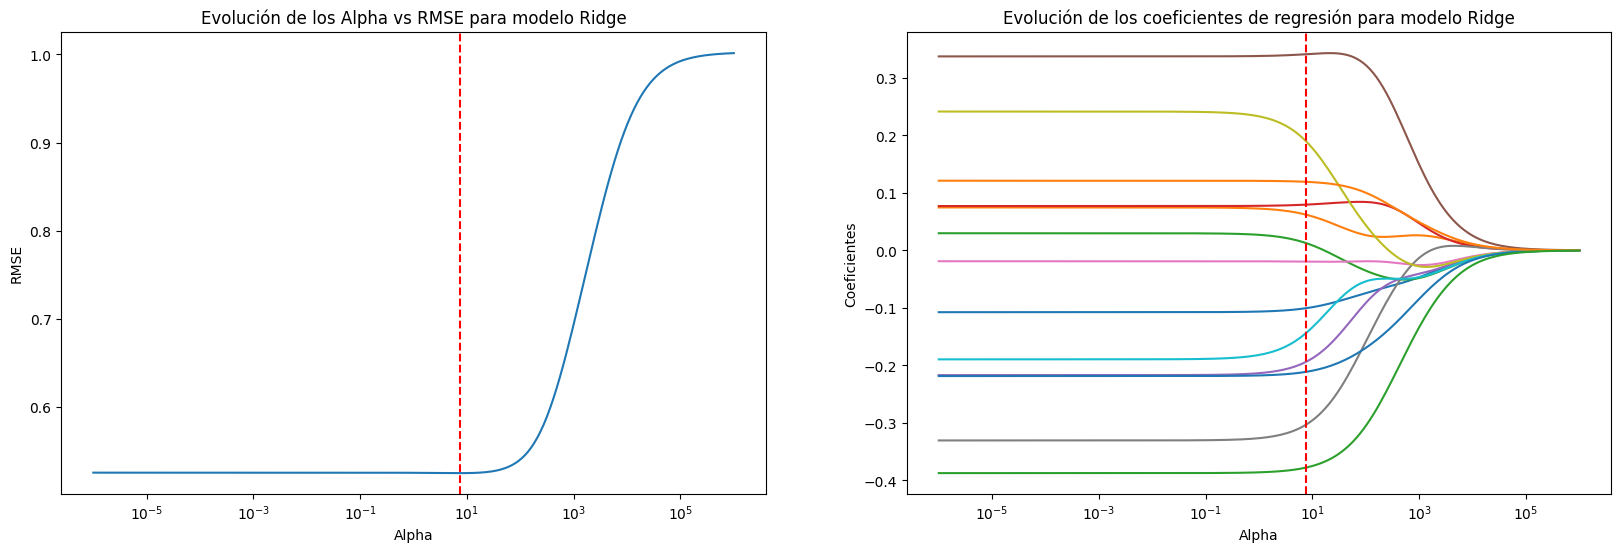

In [2]:
# Definir un rango de valores para alpha
ridge_alphas = np.logspace(-6, 6, 200)

# Crear una instancia de RidgeCV (Cross Validation) con los valores de alpha
ridge_cv_model = RidgeCV(alphas=ridge_alphas, store_cv_values=True)
ridge_cv_model.fit(X_train, y_train)

# Obtener el valor óptimo de alpha
optimal_alpha_ridge = ridge_cv_model.alpha_

# Ajustar el modelo Ridge con el valor óptimo de alpha
ridge_model = Ridge(alpha=optimal_alpha_ridge)
ridge_model.fit(X_train, y_train)

# Obtener los coeficientes para cada valor de alpha
ridge_coefs = []
for a in ridge_alphas:
    ridge = Ridge(alpha=a)
    ridge.fit(X_train, y_train)
    ridge_coefs.append(ridge.coef_)

#Generar el RMSE para cada valor de alpha
rmse_ridge = np.sqrt(ridge_cv_model.cv_values_.mean(axis = 0))

# Generar las gráficas para la evolución de los coeficientes de regresión
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Gráfica para Alpha vs RMSE
axes[0].plot(ridge_alphas, rmse_ridge)
axes[0].axvline(optimal_alpha_ridge, color='red', linestyle='--')
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Evolución de los Alpha vs RMSE para modelo Ridge')
axes[0].axis('tight')

# Gráfica para coeficientes vs Alpha
axes[1].plot(ridge_alphas, ridge_coefs)
axes[1].axvline(optimal_alpha_ridge, color='red', linestyle='--')
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coeficientes')
axes[1].set_title('Evolución de los coeficientes de regresión para modelo Ridge')
axes[1].axis('tight')

#Posición del alpha optimo en el vector de alphas
pos_alpha_opt = np.where(ridge_alphas == optimal_alpha_ridge)[0][0]

print(f"La posición para Alpha y RMSE en sus respectivos arreglos es: {pos_alpha_opt}")
print(f"Alpha Óptimo para modelo Ridge: {ridge_alphas[pos_alpha_opt]}")
print(f"mejor RMSE para modelo Ridge: {rmse_ridge[pos_alpha_opt]}")

plt.show()

   predictores  coeficientes
0         CRIM     -0.100675
1           ZN      0.062299
2        INDUS      0.012936
3         CHAS      0.079541
4          NOX     -0.194204
5           RM      0.341221
6          AGE     -0.019555
7          DIS     -0.303601
8          RAD      0.190442
9          TAX     -0.144356
10     PTRATIO     -0.211414
11           B      0.119326
12       LSTAT     -0.377993


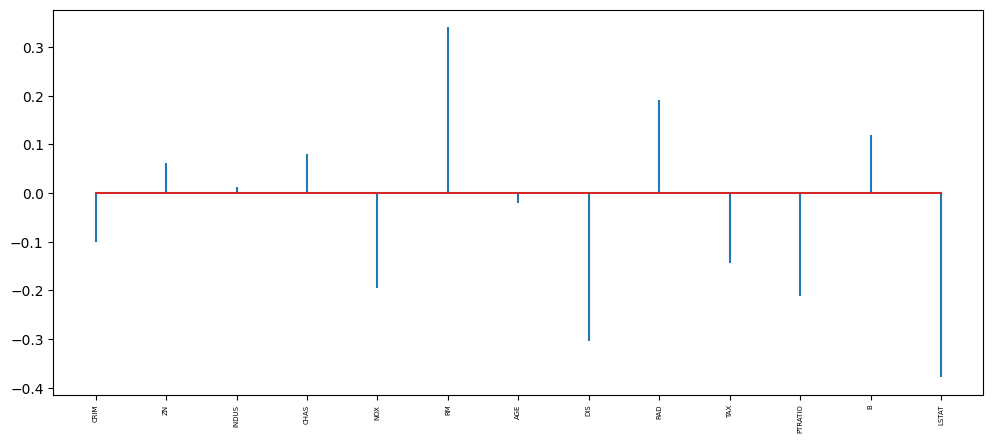

In [3]:
# Coeficientes del modelo Ridge con el alpha óptimo y los predictores seleccionados
df_coeficientes_model1 = pd.DataFrame({
    "predictores": df.columns[:-1],
    "coeficientes": ridge_cv_model.coef_.flatten()
    })

df_coeficientes_model1 = df_coeficientes_model1.query("coeficientes != 0")
print(df_coeficientes_model1)
fig, ax = plt.subplots(figsize = (12, 5))
ax.stem(df_coeficientes_model1.predictores, df_coeficientes_model1.coeficientes, markerfmt = ' ')
plt.xticks(rotation = 90, size = 5)
plt.show()

La fórmula que describe el modelo Ridge con Alpha óptimo es:

$$
\hat{y} = -0.100675 \cdot \text{CRIM} + 0.062299 \cdot \text{ZN} + 0.012936 \cdot \text{INDUS} + 0.079541 \cdot \text{CHAS} - 0.194204 \cdot \text{NOX} + 0.341221 \cdot \text{RM} - 0.019555 \cdot \text{AGE} - 0.303601 \cdot \text{DIS} + 0.190442 \cdot \text{RAD} - 0.144356 \cdot \text{TAX} - 0.211414 \cdot \text{PTRATIO} + 0.119326 \cdot \text{B} - 0.377993 \cdot \text{LSTAT}
$$


In [4]:
# Predicciones en el conjunto de prueba y cálculo del RMSE en el conjunto de prueba
y_pred_scaled = ridge_cv_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Desescalar predicciones

rmse_ridge = mean_squared_error(
                y_true=y_test,
                y_pred=y_pred,
                squared=False
             )
print(f"\nEl error (RMSE) de test para el modelo Ridge es: {rmse_ridge}")


El error (RMSE) de test para el modelo Ridge es: 5.232700970923244


### **Modelo Lasso**

La posición para Alpha y RMSE en sus respectivos arreglos es: 146
Alpha Óptimo para modelo Lasso: 636.8249944718586
mejor RMSE para modelo Lasso: 0.526755984252953


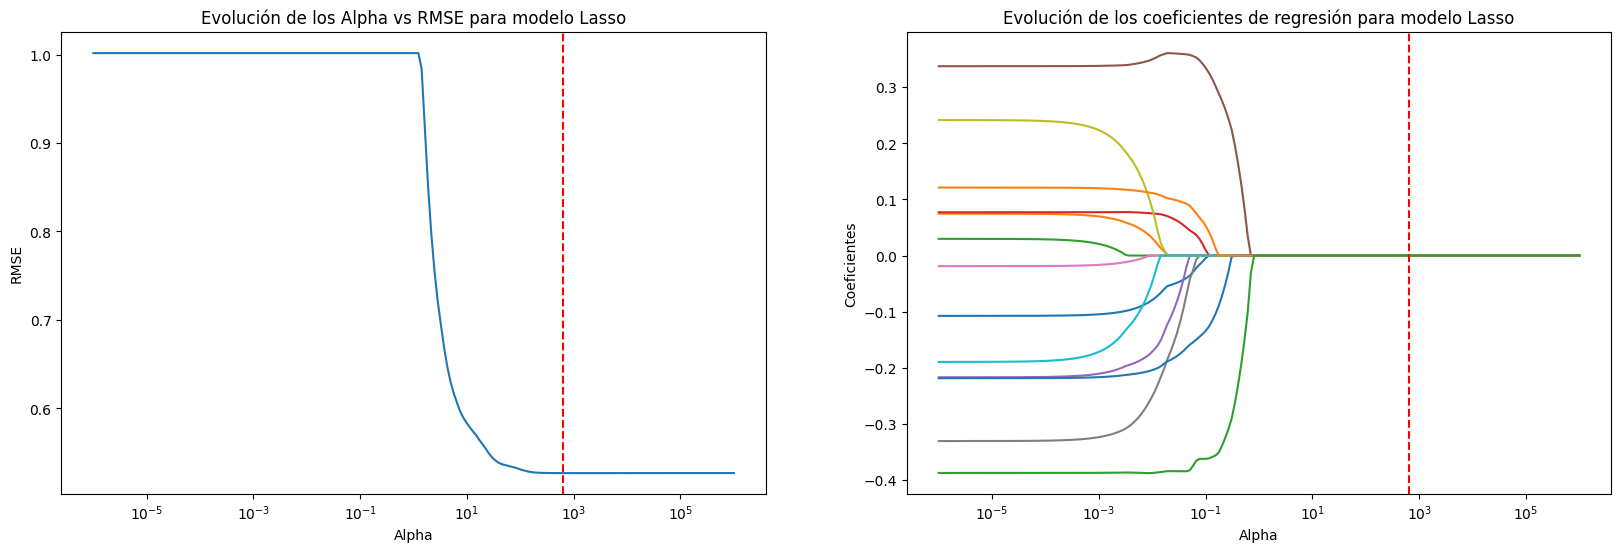

In [5]:
# Definir un rango de valores para alpha
lasso_alphas = np.logspace(-6, 6, 200)

# Crear una instancia de LassoCV con los valores de alpha
lasso_cv_model = LassoCV(alphas=lasso_alphas, fit_intercept=True, cv=10)
lasso_cv_model.fit(X_train, y_train)

#Generar el RMSE para cada valor de alpha
mse_path_lasso = lasso_cv_model.mse_path_
rmse_lasso = np.sqrt(mse_path_lasso.mean(axis=1))
# Obtener el índice donde el RMSE es mínimo
min_rmse_index = np.argmin(rmse_lasso)
optimal_alpha_lasso = lasso_alphas[min_rmse_index]

# Ajustar el modelo Lasso con el valor óptimo de alpha
lasso_model = Lasso(alpha=optimal_alpha_lasso)
lasso_model.fit(X_train, y_train)

# Obtener los coeficientes para cada valor de alpha
lasso_coefs = []
for a in lasso_alphas:
    lasso = Lasso(alpha=a)
    lasso.fit(X_train, y_train)
    lasso_coefs.append(lasso.coef_)

# Generar las gráficas para la evolución de los coeficientes de regresión
fig, axes = plt.subplots(1, 2, figsize=(20, 6))
# Gráfica para Alpha vs RMSE
axes[0].plot(lasso_alphas, rmse_lasso)
axes[0].axvline(optimal_alpha_lasso, color='red', linestyle='--')
axes[0].set_xscale('log')
axes[0].set_xlabel('Alpha')
axes[0].set_ylabel('RMSE')
axes[0].set_title('Evolución de los Alpha vs RMSE para modelo Lasso')
axes[0].axis('tight')

# Gráfica para coeficientes vs Alpha
axes[1].plot(lasso_alphas, lasso_coefs)
axes[1].axvline(optimal_alpha_lasso, color='red', linestyle='--')
axes[1].set_xscale('log')
axes[1].set_xlabel('Alpha')
axes[1].set_ylabel('Coeficientes')
axes[1].set_title('Evolución de los coeficientes de regresión para modelo Lasso')
axes[1].axis('tight')

#Posición del alpha optimo en el vector de alphas
pos_alpha_opt = np.where(lasso_alphas == optimal_alpha_lasso)[0][0]

print(f"La posición para Alpha y RMSE en sus respectivos arreglos es: {pos_alpha_opt}")
print(f"Alpha Óptimo para modelo Lasso: {lasso_alphas[pos_alpha_opt]}")
print(f"mejor RMSE para modelo Lasso: {rmse_lasso[pos_alpha_opt]}")

plt.show()

   predictores  coeficientes
0         CRIM     -0.103165
1           ZN      0.066909
2        INDUS      0.015573
3         CHAS      0.077325
4          NOX     -0.207062
5           RM      0.338426
6          AGE     -0.015306
7          DIS     -0.319623
8          RAD      0.213311
9          TAX     -0.161430
10     PTRATIO     -0.215730
11           B      0.119321
12       LSTAT     -0.387121


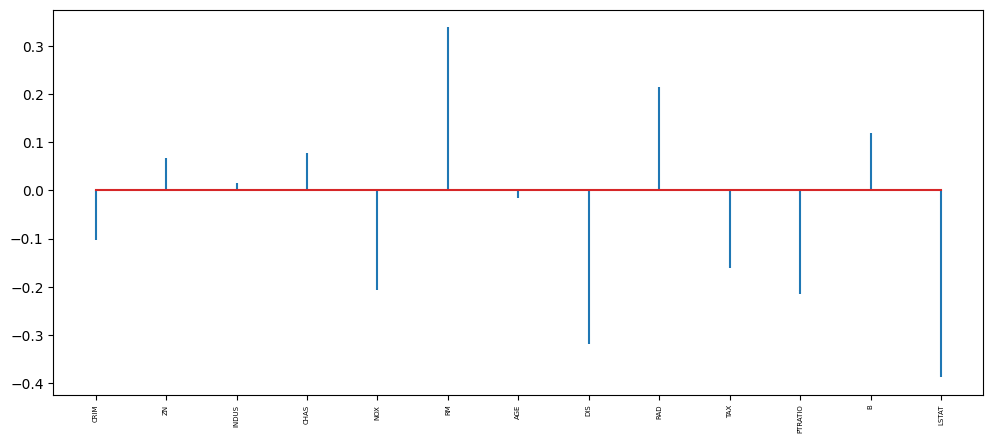

In [6]:
# Coeficientes del modelo Lasso con el alpha óptimo y los predictores seleccionados
df_coeficientes_model2 = pd.DataFrame({
    "predictores": df.columns[:-1],
    "coeficientes": lasso_cv_model.coef_.flatten()
    })

df_coeficientes_model2 = df_coeficientes_model2.query("coeficientes != 0")
print(df_coeficientes_model2)
fig, ax = plt.subplots(figsize = (12, 5))
ax.stem(df_coeficientes_model2.predictores, df_coeficientes_model2.coeficientes, markerfmt = ' ')
plt.xticks(rotation = 90, size = 5)
plt.show()

La fórmula que describe el modelo Lasso con Alpha óptimo es:

$$
\hat{y} = -0.103165 \cdot \text{CRIM} + 0.066909 \cdot \text{ZN} + 0.015573 \cdot \text{INDUS} + 0.077325 \cdot \text{CHAS} - 0.207062 \cdot \text{NOX} + 0.338426 \cdot \text{RM} - 0.015306 \cdot \text{AGE} - 0.319623 \cdot \text{DIS} + 0.213311 \cdot \text{RAD} - 0.161430 \cdot \text{TAX} - 0.215730 \cdot \text{PTRATIO} + 0.119321 \cdot \text{B} - 0.387121 \cdot \text{LSTAT}
$$


In [7]:
# Predicciones en el conjunto de prueba y cálculo del RMSE en el conjunto de prueba
y_pred_scaled = lasso_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Desescalar predicciones

rmse_lasso = mean_squared_error(
                y_true=y_test,
                y_pred=y_pred,
                squared=False
             )
print(f"\nEl error (RMSE) de test para el modelo Lasso es: {rmse_lasso}")


El error (RMSE) de test para el modelo Lasso es: 8.662876564628666


### **Modelo Elastic-Net**

Mejor RMSE encontrado para cada l1_ratio:
    l1_ratio  best_rmse
0       0.00   0.650356
1       0.10   0.670787
2       0.20   0.678059
3       0.30   0.682833
4       0.40   0.686446
5       0.50   0.689342
6       0.60   0.691771
7       0.70   0.693881
8       0.80   0.695729
9       0.90   0.697363
10      0.95   0.698154
11      0.99   0.698707
12      1.00   0.698847


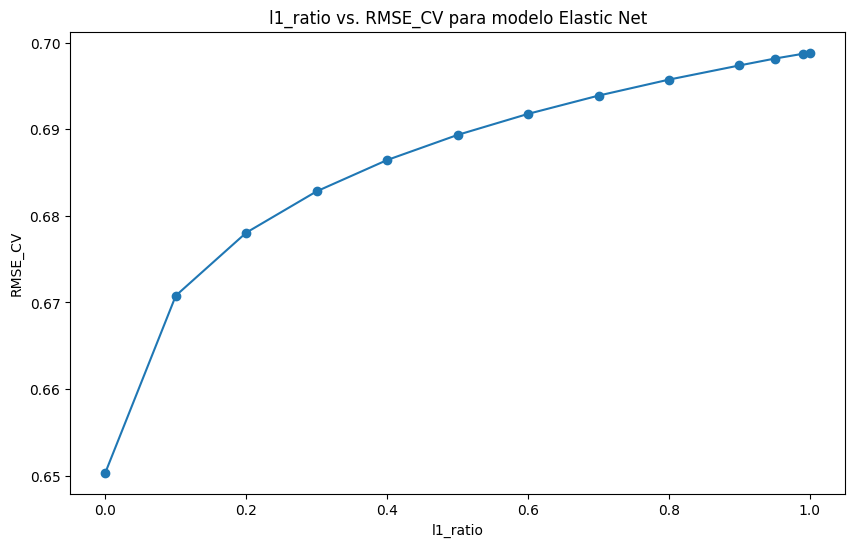

In [8]:
# Definir un rango de valores para alpha y l1_ratio
elasticnet_alphas = np.logspace(-6, 6, 200)
l1_ratios = [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 0.95, 0.99, 1]  # Valores típicos de l1_ratio

# Crear una instancia de ElasticNetCV con los valores de alpha y l1_ratio
elasticnet_cv_model = ElasticNetCV(alphas=elasticnet_alphas, l1_ratio=l1_ratios, cv=10, random_state=42)
elasticnet_cv_model.fit(X_train, y_train)

# Obtener el valor óptimo de alpha y l1_ratio
optimal_alpha = elasticnet_cv_model.alpha_
optimal_l1_ratio = elasticnet_cv_model.l1_ratio_

# Cálculo del RMSE promedio para cada l1_ratio
rmse_cv_values = np.sqrt(elasticnet_cv_model.mse_path_.mean(axis=1))

# Crear DataFrame con el mejor RMSE para cada l1_ratio
best_rmse_per_l1_ratio = {
    "l1_ratio": l1_ratios,
    "best_rmse": [np.min(rmse_cv_values[i]) for i in range(len(l1_ratios))]
}
df_best_rmse = pd.DataFrame(best_rmse_per_l1_ratio)
print("Mejor RMSE encontrado para cada l1_ratio:")
print(df_best_rmse)

# Gráfico de l1_ratio vs. RMSE_CV
plt.figure(figsize=(10, 6))
plt.plot(df_best_rmse["l1_ratio"], df_best_rmse["best_rmse"], marker='o')
plt.xlabel("l1_ratio")
plt.ylabel("RMSE_CV")
plt.title("l1_ratio vs. RMSE_CV para modelo Elastic Net")
plt.show()


En la gráfica anterior, observamos que el mejor valor de `l1_ratio` es 0. Esto indica que, bajo estas condiciones, el modelo Elastic Net se convierte en un modelo Ridge. A continuación, procedemos a visualizar la gráfica de los coeficientes del modelo con estas condiciones.

   predictores  coeficientes
0         CRIM     -0.100496
1           ZN      0.061986
2        INDUS      0.012522
3         CHAS      0.079599
4          NOX     -0.193574
5           RM      0.341298
6          AGE     -0.019567
7          DIS     -0.302838
8          RAD      0.189188
9          TAX     -0.143297
10     PTRATIO     -0.211212
11           B      0.119269
12       LSTAT     -0.377717


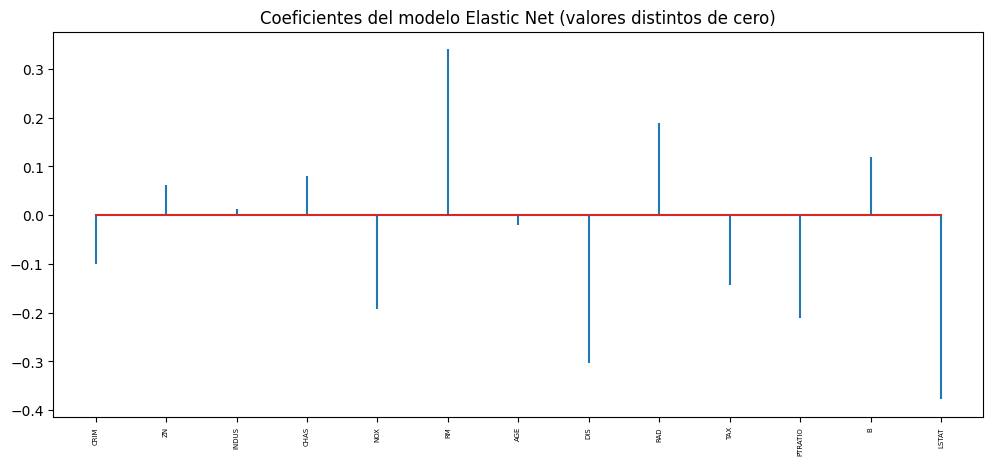

In [9]:
# DataFrame de los coeficientes no nulos del modelo final
df_coeficientes_model = pd.DataFrame({
    "predictores": df.columns[:-1],  # Acceder a las columnas de X
    "coeficientes": elasticnet_cv_model.coef_
})
df_coeficientes_model = df_coeficientes_model.query("coeficientes != 0")
print(df_coeficientes_model)

# Gráfico tipo "stem" de los coeficientes
fig, ax = plt.subplots(figsize=(12, 5))
ax.stem(df_coeficientes_model.predictores, df_coeficientes_model.coeficientes, markerfmt=' ')
plt.xticks(rotation=90, size=5)
plt.title("Coeficientes del modelo Elastic Net (valores distintos de cero)")
plt.show()

La fórmula que describe el modelo ElasticNet con Alpha óptimo y L1_Ratio óptimo es:

$$
y = -0.100496 \cdot \text{CRIM} + 0.061986 \cdot \text{ZN} + 0.012522 \cdot \text{INDUS} + 0.079599 \cdot \text{CHAS} - 0.193574 \cdot \text{NOX} + 0.341298 \cdot \text{RM} - 0.019567 \cdot \text{AGE} - 0.302838 \cdot \text{DIS} + 0.189188 \cdot \text{RAD} - 0.143297 \cdot \text{TAX} - 0.211212 \cdot \text{PTRATIO} + 0.119269 \cdot \text{B} - 0.377717 \cdot \text{LSTAT}


In [10]:
# Predicciones en el conjunto de prueba y cálculo del RMSE en el conjunto de prueba
y_pred_scaled = elasticnet_cv_model.predict(X_test)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).ravel()  # Desescalar predicciones

rmse_elasticnet = mean_squared_error(
                y_true=y_test,
                y_pred=y_pred,
                squared=False
             )
print(f"\nEl error (RMSE) de test para el modelo ElasticNet es: {rmse_elasticnet}")


El error (RMSE) de test para el modelo ElasticNet es: 5.232645127679708


### **Comparación de Modelos**

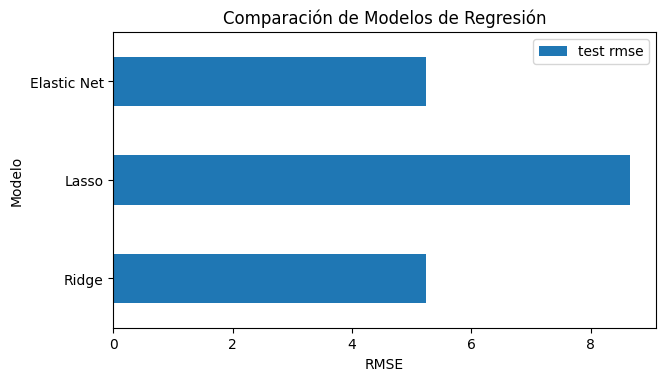

RMSE para cada modelo:
        modelo  test rmse
0        Ridge      5.233
1        Lasso      8.663
2  Elastic Net      5.233


In [11]:
# Comparación de modelos
df_comparacion = pd.DataFrame({
    'modelo': ['Ridge', 'Lasso', 'Elastic Net'],
    'test rmse': [round(rmse_ridge, 3), round(rmse_lasso, 3), round(rmse_elasticnet, 3)]
})

fig, ax = plt.subplots(figsize=(7, 3.84))
df_comparacion.set_index('modelo').plot(kind='barh', ax=ax)
ax.set_xlabel('RMSE')
ax.set_ylabel('Modelo')
ax.set_title('Comparación de Modelos de Regresión')
plt.show()

# Mostrar RMSE de cada modelo
print("RMSE para cada modelo:")
print(df_comparacion)

### **Conclusión sobre el Mejor Modelo**

Después de comparar los modelos de regresión Ridge, Lasso y Elastic Net, podemos concluir lo siguiente:

- **Ridge**: El modelo Ridge obtuvo un RMSE de 5.2327 en el conjunto de prueba.
- **Lasso**: El modelo Lasso obtuvo un RMSE de 8.6629 en el conjunto de prueba.
- **Elastic Net**: El modelo Elastic Net obtuvo un RMSE de 5.2326 en el conjunto de prueba.

El modelo Elastic Net y el modelo Ridge tienen el mismo rendimiento, con RMSEs idénticos. Por lo tanto, podemos concluir que el **modelo Ridge** o el **modelo ElasticNet** son el mejor modelo para este conjunto de datos, ya que proporciona el menor error cuadrático medio en el conjunto de prueba.